### Use decision trees to understand the drivers behind consumer behavior

#### Logistic regression versus decision trees

A logistic regression model learns from the data by finding the linear combination of the feature variables that best estimates the log odds of an event occurring. Decision trees, as the name suggests, learn from the data by growing a tree.

the main difference between the logistic regression and decision tree models is the fact that logistic regression algorithms search for a single best linear boundary in the feature set, whereas the decision tree algorithm partitions the data to find the subgroups of data that have high likelihoods of an event occurring.

When we are growing decision trees, the trees need to come up with a logic to split a node into child nodes. There are two main methods that are commonly used for splitting the data: Gini impurity and entropy information gain. Simply put, Gini impurity measures how impure a partition is, and entropy information gain measures how much information it gains from splitting the data with the criteria being tested.

- Information gain is the main key that is used by Decision Tree Algorithms to construct a Decision Tree.
- Decision Trees algorithm will always tries to maximize Information gain.
- An attribute with highest Information gain will tested/split first.

Decision tree identifies the most significant variable and its value that gives best homogeneous sets of population!

### Case Study: 
#### Decision trees and interpretations with Python
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).


In [35]:
%matplotlib inline
# use the %matplotlib inline command to show plots on the Jupyter Notebook
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('bank-full_decisiontree.csv', sep=";")

In [2]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

In [4]:
# Encode the output variable y by creating a new column conversion
df['conversion'] = df['y'].apply(lambda x: 0 if x == 'no' else 1)

In [5]:
# check the conversion rate
conversion_rate_df = pd.DataFrame(df.groupby('conversion').count()['y'] / df.shape[0] * 100.0)

In [6]:
conversion_rate_df.T
#From these results, we can see that there is a large imbalance between the conversion group and the non-conversion group,
# which is common and is frequently observed among various marketing datasets

conversion,0,1
y,88.30152,11.69848


In [7]:
# Conversion rates by job
conversion_rate_by_job = df.groupby('job')['conversion'].sum() / df.groupby('job')['conversion'].count() * 100.0
conversion_rate_by_job

job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown          11.805556
Name: conversion, dtype: float64

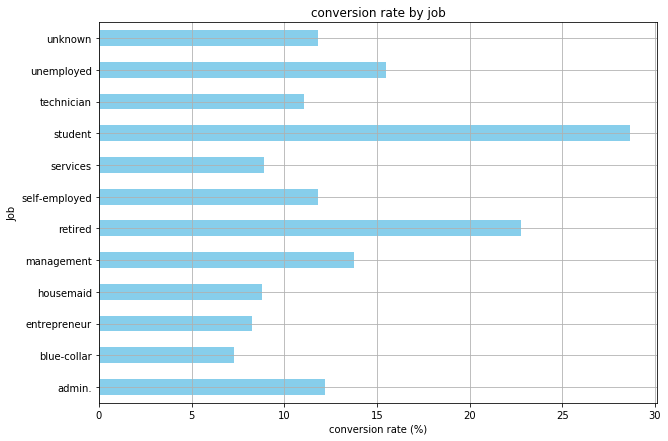

In [8]:
# let's plot
ax = conversion_rate_by_job.plot(
    kind = 'barh',
    color='skyblue',
    grid=True,
    figsize=(10,7),
    title='conversion rate by job')

ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Job')
plt.show()
# We can easily see that the student and retired groups are the two groups with the highest conversion rates,
# whereas the blue-collar and entrepreneur groups are the two groups with the lowest conversion rates

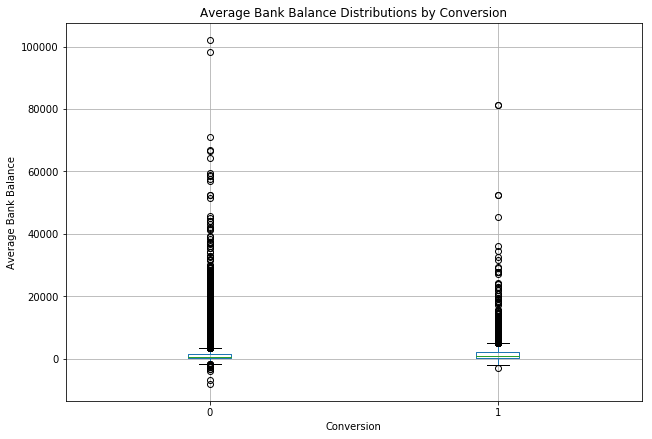

In [9]:
# Bank balances by conversions by using box plot
ax = df[['conversion', 'balance']].boxplot(
    by='conversion',
    showfliers=True,
    figsize=(10, 7)
)

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle("")
plt.show()

###### Understanding Boxplots: 
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed
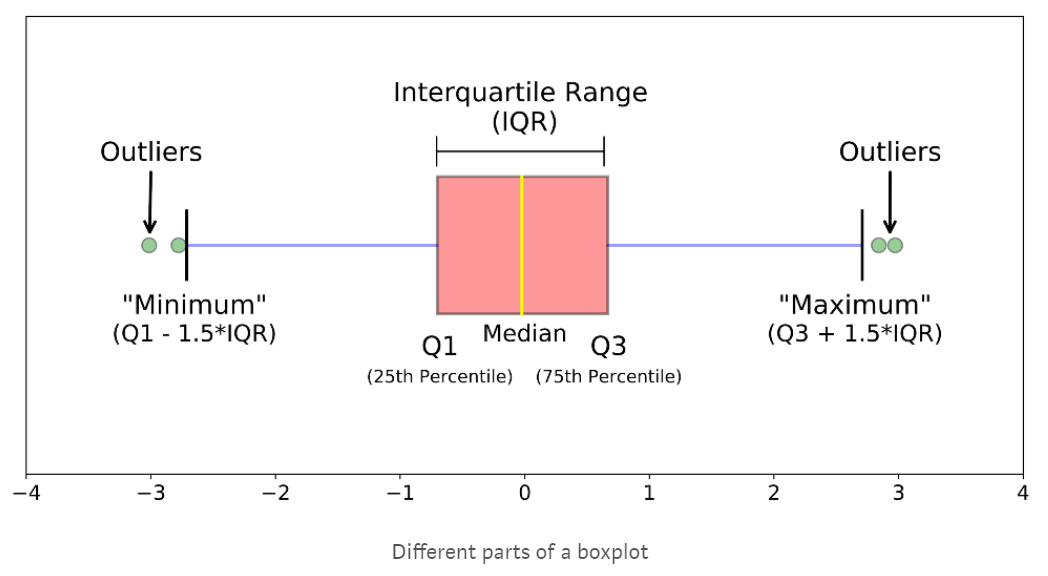

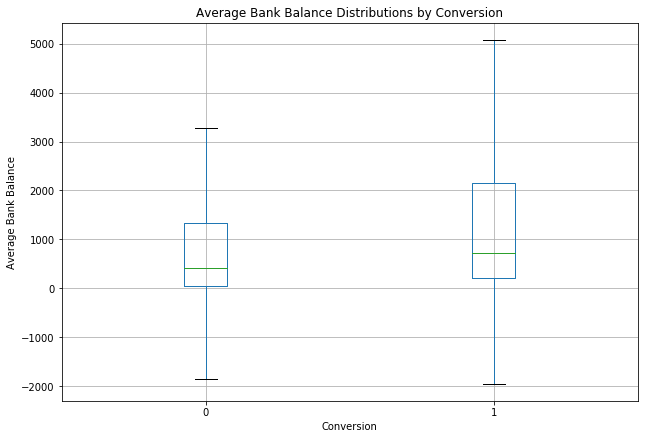

In [10]:
# Because there are so many outliers, it is quite difficult to identify any differences between the two distributions
# change showflier to False
ax = df[['conversion', 'balance']].boxplot(
    by='conversion',
    showfliers=False,
    figsize=(10, 7)
)

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle("")
plt.show()
# bank balances of converted customers seem to vary more than those of non-converted customers

###### Marketing Fatigue: 
Typically, in marketing, a higher number of marketing touches can result in marketing fatigue, where the conversion rates drop as you reach out to your customers more frequently

In [11]:
# Let's see whether there is any marketing fatigue by looking at number of contacts
conversions_by_num_contacts =df.groupby('campaign')['conversion'].sum() / df.groupby('campaign')['conversion'].count()*100.0
conversions_by_num_contacts

campaign
1     14.597583
2     11.203519
3     11.193624
4      9.000568
5      7.879819
6      7.126259
7      6.394558
8      5.925926
9      6.422018
10     5.263158
11     7.960199
12     2.580645
13     4.511278
14     4.301075
15     4.761905
16     2.531646
17     8.695652
18     0.000000
19     0.000000
20     2.325581
21     2.857143
22     0.000000
23     0.000000
24     5.000000
25     0.000000
26     0.000000
27     0.000000
28     0.000000
29     6.250000
30     0.000000
31     0.000000
32    11.111111
33     0.000000
34     0.000000
35     0.000000
36     0.000000
37     0.000000
38     0.000000
39     0.000000
41     0.000000
43     0.000000
44     0.000000
46     0.000000
50     0.000000
51     0.000000
55     0.000000
58     0.000000
63     0.000000
Name: conversion, dtype: float64

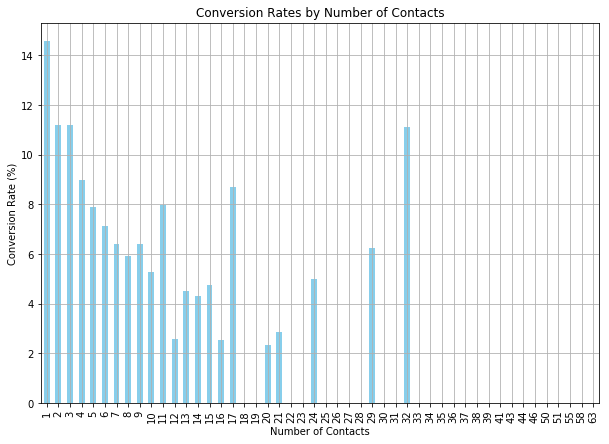

In [12]:
ax = conversions_by_num_contacts.plot(
    kind='bar',
    figsize=(10, 7),
    title='Conversion Rates by Number of Contacts',
    grid=True,
    color='skyblue'
)

ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')

plt.show()
# There's some noise in a higher numbers of contacts, as the sample size is smaller for them, 
# but you can easily see the overall downward trend. 
#  This suggests that the expected conversion rate decreases as you contact a client more frequently for a given campaign

In [13]:
# Encoding categorical variables
# Before we start to build decision trees, we need to encode these categorical variables with numerical values
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [14]:
import calendar
month_number = dict((v.lower(),k) for k,v in enumerate(calendar.month_abbr))

month_number

{'': 0,
 'jan': 1,
 'feb': 2,
 'mar': 3,
 'apr': 4,
 'may': 5,
 'jun': 6,
 'jul': 7,
 'aug': 8,
 'sep': 9,
 'oct': 10,
 'nov': 11,
 'dec': 12}

In [15]:
# Since there is a natural ordering in the values of month, we can encode each of the values with a corresponding number.
months=['jan','feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
        
df['month'] = df['month'].apply(lambda x: months.index(x) + 1)

In [16]:
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

In [17]:
df.groupby('month')['conversion'].count()

month
1      1403
2      2649
3       477
4      2932
5     13766
6      5341
7      6895
8      6247
9       579
10      738
11     3970
12      214
Name: conversion, dtype: int64

In [18]:
# Encode the different categories of the job columnn
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [19]:
# there is no natural ordering for this variable, so create dummy variables for each of the job categories

In [20]:
jobs_encoded_df = pd.get_dummies(df['job'])
jobs_encoded_df
# the get_dummies function in the pandas package creates one dummy variable for each category in the job variable, 
# and encodes each record with 1 if the given record belongs to the corresponding category, and 0 if not

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0


In [21]:
#  We rename the columns by prefixing each column with job_
jobs_encoded_df.columns = ['job_%s' % x for x in jobs_encoded_df.columns]

In [22]:
# Append this data to the existing DataFrame
df=pd.concat([df,jobs_encoded_df], axis=1) 
# axis=1 argument tells the concat function to concatenate the second DataFrame to the first DataFrame as columns, not as rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1


In [23]:
# Encoding marital
marital_encoded_df = pd.get_dummies(df['marital'])
marital_encoded_df.columns = ['marital_%s' % x for x in marital_encoded_df.columns]

In [24]:
df = pd.concat([df, marital_encoded_df], axis=1)

In [25]:
# Encoding the housing and loan variables
df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)

In [26]:
# Building decision trees
from sklearn import tree

In [27]:
# decide features and decide target varaible

features = [
    'age',
    'balance',
    'campaign',
    'previous',
    'housing',
] + list(jobs_encoded_df.columns) + list(marital_encoded_df.columns)

response_var = 'conversion'

In [28]:
# Under the tree module in the sklearn package, there is a class named DecisionTreeClassifier,
# which we can use to train a decision tree model
dt_model = tree.DecisionTreeClassifier(max_depth=4)
# Themax_depth argument controls how much a tree can grow, and here, 
# we limit it to 4, meaning that the maximum length from the root to a leaf can be 4

In [29]:
# train model
dt_model.fit(df[features], df[response_var])
# fit function takes two arguments: the predictor or feature variables and the response or target variables

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
# Interpreting decision trees:
# in Terminal:conda install python-graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
# import pydotplus
import graphviz

In [33]:
# Install windows package from: https://graphviz.gitlab.io/_pages/Download/Download_windows.html
import os
os.environ['PATH'].split(os.pathsep)
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

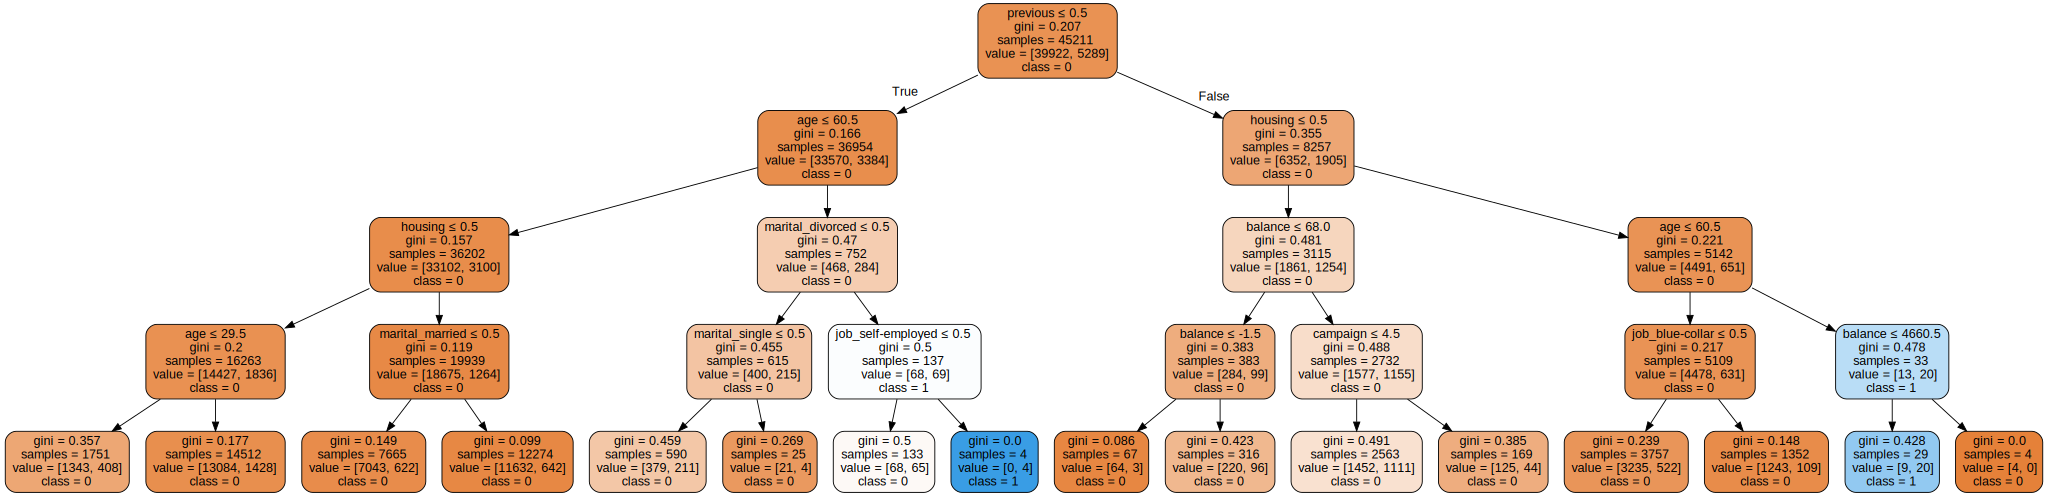

In [34]:
dot_data = tree.export_graphviz(
    dt_model, 
    feature_names=features, 
    class_names=['0', '1'], 
    filled=True, 
    rounded=True, 
    special_characters=True
) 

graph = graphviz.Source(dot_data)
graph

###### How to read a Decision Tree
- Each node contains five lines that describe the information that the given node has
- The top line tells us the criteria of the split. The root node, for example, is split into its child nodes based on the value of the previous variable. If the value of this previous variable is less than or equal to 0.5, then it goes to the left child. On the other hand, if the value of this previous variable is larger than 0.5, then it goes to the right child
- The second line tells us the value of the quality measure for the split. Here, we selected the gini impurity measure for the criteria, so we can see the changes in the impurity measures in each node from the second line.
- The third line tells us the total number of records that belong to the given node.
- The fourth line in each node tells us the composition of the records in two different classes. The first element stands for the number of records in the non-conversion group, and the second element stands for the number of records in the conversion group.
- The fifth line in each node tells us what the prediction or classification will be for the given node. For example, if a sample belongs to the leftmost leaf, the classification by this decision tree model will be 0, meaning non-conversion. On the other hand, if a sample belongs to the eighth leaf from the left, the classification by this decision tree model will be 1, meaning conversion